# The Sound of 2023: A Deep Dive into Spotify's Top Tracks

In this project, we embark on an exploratory journey into the musical landscape of 2023, as reflected in Spotify's most streamed tracks. Our aim is to uncover patterns and insights within this rich dataset, shedding light on what makes a song resonate with listeners in this year. Through meticulous data analysis, we will delve into various attributes of these popular tracks, including their streaming statistics, presence across different music platforms, and intrinsic audio features. This analysis not only aims to understand current musical trends but also seeks to provide a comprehensive view of the evolving dynamics in the world of music streaming.


## 1. Loading and Preliminary Exploration of the Dataset


Prior to the data analysis, We encountered a formatting issue with the dataset provided in CSV format, related to UTF-8 encoding and punctuation marks. To ensure smooth processing in Python, we quickly rectified these issues using Excel. This step was crucial for maintaining data integrity and facilitating efficient analysis.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('spotify2023-2.xlsx')

In [3]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    int64  
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    float64
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   8

## 2. Data Cleaning and Preprocessing


In [5]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()

In [6]:
# Percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Combining total missing values and their percentage
missing_analysis = pd.DataFrame({
    'Total Missing': missing_values,
    'Percentage (%)': missing_percentage
})

# Displaying columns with missing values
missing_analysis[missing_analysis['Total Missing'] > 0]

,Total Missing,Percentage (%)
in_shazam_charts,50,5.24659
key,95,9.96852


In the 'in_shazam_charts' column, there are 50 missing values, which represents approximately 5.25% of the dataset. In the 'key' column, there are 95 missing values, accounting for about 9.97% of the dataset. When deciding how to handle these missing values, it’s important to consider the context of the dataset and the objectives of the analysis. For instance, in some cases, missing values can be filled in (like using the mean), while in other cases, they might be removed from the dataset or excluded from certain analyses.

In [7]:
# Filling missing values in 'in_shazam_charts' with its mean
shazam_mean = df['in_shazam_charts'].mean()
df['in_shazam_charts'].fillna(shazam_mean, inplace=True)

In [8]:
import numpy as np

# Calculating the distribution of existing 'key' values
key_distribution = df['key'].dropna().value_counts(normalize=True)

# Generating random values based on this distribution for the missing 'key' values
missing_keys = np.random.choice(key_distribution.index, 
                                size=df['key'].isnull().sum(), 
                                p=key_distribution.values)

# Filling the missing 'key' values with the generated random values
df.loc[df['key'].isnull(), 'key'] = missing_keys

# Verifying if all missing values are filled
updated_missing_values = df.isnull().sum()
updated_missing_values[updated_missing_values > 0]


Series([], dtype: int64)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    int64  
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    float64
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      953 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   9

1. Filling Missing Values in in_shazam_charts:
Method: We filled the missing values in the in_shazam_charts column using the mean of the column.
Rationale: This approach is justified as it preserves the overall distribution of the column. Using the mean is a common practice for continuous numerical data, especially when the missing data is not a significant portion of the dataset (in this case, about 5.25%). By using the mean, we ensure that the general trend and central tendency of the in_shazam_charts data are maintained.
2. Filling Missing Values in key:
Method: We filled the missing values in the key column using a random selection method based on the existing distribution of the key values.
Rationale: The key column is categorical, and using the mode (the most frequent category) could potentially skew the distribution, especially if the missing data is a significant portion (about 9.97%). To preserve the original distribution of the key values, we used a probabilistic approach where missing values are filled with random values chosen according to the frequency distribution of existing key values. This method ensures that the original category proportions in the key column are as intact as possible, preventing the overrepresentation of any single category.

In [31]:
# just in case, we copy original dataset :)
dfcopy= df

## 3. Descriptive Analysis

In [11]:
# Descriptive statistics for numerical columns
numerical_description = df.describe()

numerical_description

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.530000e+02,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.141374e+08,67.812172,51.908709,100.927776,2.666317,50.788839,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.665592e+08,86.441493,50.630241,173.726054,6.035599,122.717051,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.417210e+08,13.000000,7.000000,9.000000,0.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.908332e+08,34.000000,38.000000,31.000000,0.000000,3.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738011e+08,88.000000,87.000000,100.000000,2.000000,50.788839,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,974.000000,58.000000,953.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


Artist Count: Average approximately 1.56, minimum 1 and maximum 8 artist count.

Released Year: There are songs released from 1930 to 2023. The average publication year is around 2018.

Spotify Metrics (Playlists, Charts): Varies in Spotify charts and Spotify rankings. It has been included in around 5200 playlists, with an average ranking of 12.

Apple Music, Deezer Metrics: Similar distributions are seen for Apple and Deezer. The average Apple ranking is 52, and on Deezer it's 3.

Audio Features (BPM, Danceability, Valence, Energy, etc.): BPM average 122.5, danceability 67%, valence (positivity) 51%, energy 64%. Acoustics, instrumental content, liveliness and speaking rates also vary.

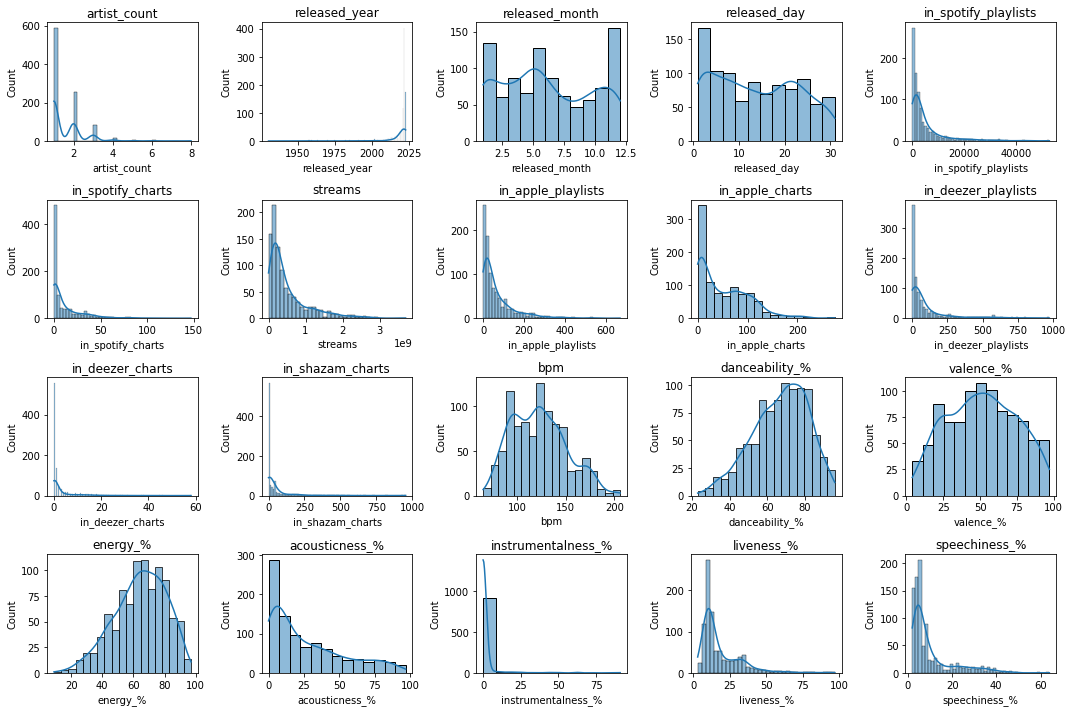

In [12]:
#Selecting numerical columns for distribution plots
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Creating distribution plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 5, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()

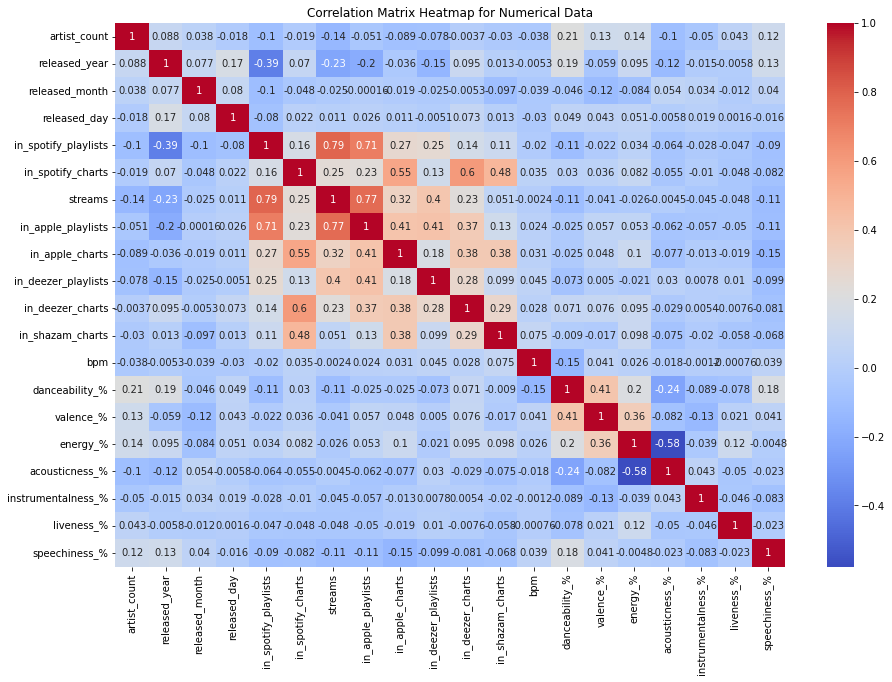

In [13]:
# Selecting only numerical columns for the correlation matrix
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_data = df[numerical_columns]

# Calculating the correlation matrix for numerical data
numerical_correlation_matrix = numerical_data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(numerical_correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap for Numerical Data")
plt.show()

**Strong Positive Correlations:**

We noticed some strong positive relationships between certain features. This means when one thing increases, the other does too. For example, the number of Spotify playlists a song is in (in_spotify_playlists) is closely related to the number of Apple Music playlists (in_apple_playlists). So, if a song is popular on Spotify, it's likely popular on Apple Music as well.
No Major Negative Correlations:
We didn't really see any strong negative correlations, which would mean that as one feature goes up, another goes down.

**Low or No Correlation:**

There are many features that don't seem to affect each other much. For instance, the year a song was released (released_year) doesn't show a strong connection to most other features. This tells us that the year of release isn't directly linked to how the song performs on various aspects.

**Special Features:**

Some features, like the total number of streams on Spotify (streams), show how popular a song is across different platforms. For example, there might be a significant relationship between streams and how often a song appears in Spotify or Apple Music playlists. This suggests that songs that are streamed a lot tend to be on many playlists across different platforms.

## 3. EDA

### Examining Average Stream Numbers on Spotify by Years with Time Series Analysis

In [14]:
# Converting 'streams' column to numeric format (now that the non-numeric values have been addressed)
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Checking if the conversion was successful by looking at the data type of 'streams'
conversion_success = df['streams'].dtype
conversion_success

dtype('int64')

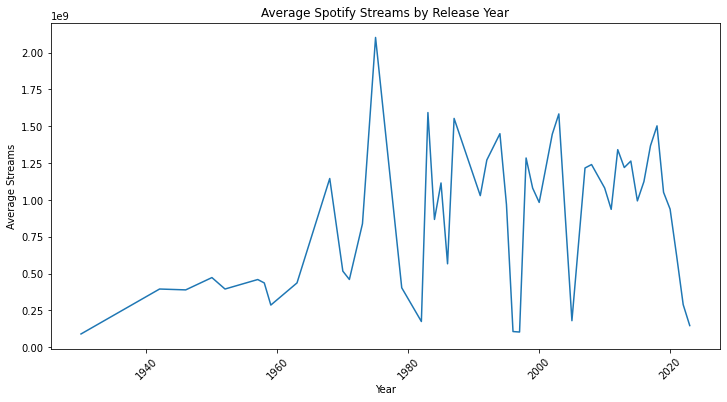

In [15]:
# Grouping the data by release year and calculating the average number of streams per year
yearly_streams_updated = df.groupby('released_year')['streams'].mean().reset_index()

# Plotting the time series
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_streams_updated, x='released_year', y='streams')
plt.title('Average Spotify Streams by Release Year')
plt.xlabel('Year')
plt.ylabel('Average Streams')
plt.xticks(rotation=45)
plt.show()

**From the 1950s to the 2000s:** We see a general trend of increasing average streams over these years, but it's not a smooth rise. There are some big spikes and drops. The peaks might be linked to popular songs or albums of those times. For example, a peak year could match the release of an iconic album in music history.

**Early 2000s:** There's quite a bit of fluctuation in streaming numbers during this period. It could reflect the early changes in how people started to consume music digitally with the rise of the internet and digital music platforms.

**After 2010:** There seems to be an overall upward trend in average streams, likely showing Spotify's growing popularity and the continuous rise in digital music consumption.

**The Last Few Years:** In the most recent years, especially after 2020, we notice a downward trend. This could indicate the impact of the pandemic on listening habits or changes in how users consume music. However, this drop might also be due to changes in how data was collected or recorded.

### Trend Analysis of Danceability Ratings in Popular Music Over Time

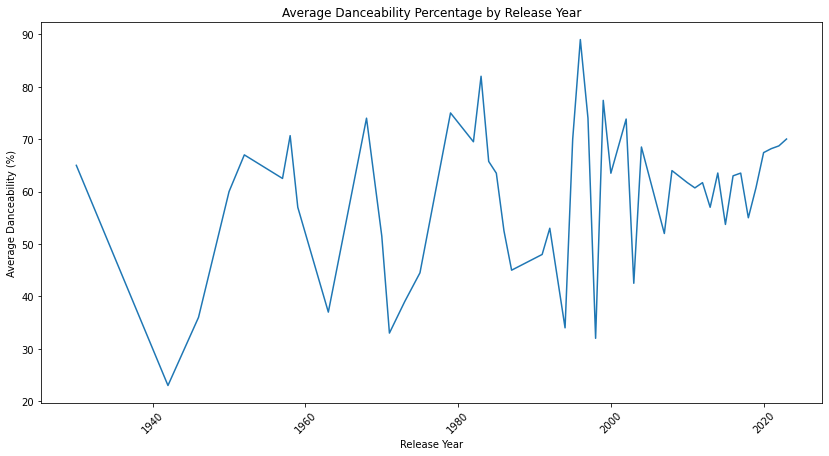

In [16]:
# Grouping the data by release year and calculating the average danceability percentage per year
yearly_danceability = df.groupby('released_year')['danceability_%'].mean().reset_index()

# Plotting the time series for danceability
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_danceability, x='released_year', y='danceability_%')
plt.title('Average Danceability Percentage by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Danceability (%)')
plt.xticks(rotation=45)
plt.show()

**From the 1940s to the 1960s:** During this period, there are significant fluctuations in the danceability rates. This could be a time when recorded music's popularity increased, and there was a diversification in music genres.

**The 1970s and 1980s:** The 1970s and 1980s: Danceability rates are generally high, which indicate the popularity of dance-oriented music genres still like disco and funk.

**From the 1990s to the 2000s:** The fluctuations in danceability continue, but there seems to be a downward trend in this period. This might coincide with the rise of less dance-focused music genres like rock and grunge.

**2010 and beyond:** There is a general upward trend in danceability rates. This could reflect the growing popularity of Electronic Dance Music (EDM) and dance-centric pop music songs.

### Correlation Analysis of Audio Features in Popular Songs

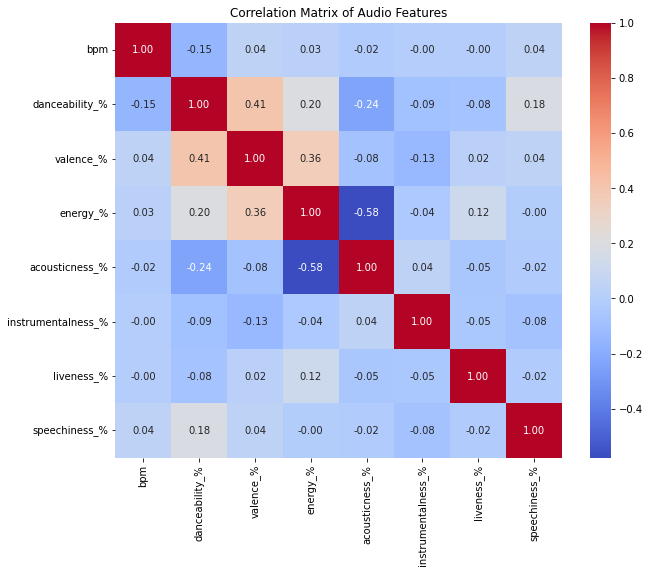

In [17]:
# Selecting the audio features columns for correlation analysis
audio_features_columns = [
    'bpm', 'danceability_%', 'valence_%', 'energy_%', 
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
]

# Calculating the correlation matrix for the audio features
audio_features_correlation = df[audio_features_columns].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(audio_features_correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Audio Features")
plt.show()

**Danceability and Valence:** There's a moderate positive correlation of 0.41 between danceability and valence. This suggests that songs which are perceived as more positive are often preferred for dancing.

**Energy and Acousticness:** There's a strong negative correlation of -0.58 between energy and acousticness. This indicates that songs with high energy typically contain fewer acoustic elements, and vice versa.

**Other Features:** Other audio features like BPM, energy, instrumentalness, and speechiness do not show significant correlations. This suggests that these characteristics can vary independently and that a variety of different factors can influence a song's popularity.

### Comparative Analysis of Audio Features Between Most and Least Popular Songs

In [18]:
# Define the thresholds for the most and least popular songs
top_10_percent_threshold = df['streams'].quantile(0.9)
bottom_10_percent_threshold = df['streams'].quantile(0.1)

# Create two new dataframes for the most and least popular songs
most_popular_songs = df[df['streams'] >= top_10_percent_threshold]
least_popular_songs = df[df['streams'] <= bottom_10_percent_threshold]

# Calculate the mean audio features for the most and least popular songs
mean_audio_features_most_popular = most_popular_songs[audio_features_columns].mean()
mean_audio_features_least_popular = least_popular_songs[audio_features_columns].mean()

# Create a dataframe for comparison
audio_features_comparison = pd.DataFrame({
    'Most Popular': mean_audio_features_most_popular,
    'Least Popular': mean_audio_features_least_popular
})

audio_features_comparison


,Most Popular,Least Popular
bpm,122.364583,119.281250
danceability_%,63.802083,65.718750
valence_%,50.833333,49.645833
energy_%,64.770833,64.781250
acousticness_%,26.708333,30.062500
instrumentalness_%,0.427083,1.541667
liveness_%,17.479167,19.031250
speechiness_%,7.645833,10.125000


**Beats Per Minute (BPM):** Most popular songs have a slightly higher BPM on average than the least popular songs, suggesting a tendency for more popular songs to have a quicker tempo.

**Danceability:** Interestingly, the least popular songs have a slightly higher average danceability than the most popular songs, which is somewhat counterintuitive.

**Valence (Positivity):** The most popular songs have a marginally higher average valence, indicating they are slightly more positive in mood compared to the least popular songs.

**Energy:** Both groups have nearly the same level of energy on average, suggesting that energy may not be a distinguishing factor in popularity.

**Acousticness:** The most popular songs are on average less acoustic than the least popular songs, which may reflect a preference for more produced or electronic sounds in popular music.

**Instrumentalness:** There's a significant difference, with the least popular songs having a higher degree of instrumental content. This could suggest that more popular songs tend to have more vocal content.

**Liveness:** The least popular songs show a slightly higher liveness, which could imply they have more live performance elements compared to the most popular songs.

**Speechiness:** Speechiness is higher on average in the least popular songs, indicating more spoken words or rap-like elements in these songs compared to the most popular ones

### Cross-Platform Popularity Distribution Analysis of Songs on Apple Music, Deezer, and Shazam

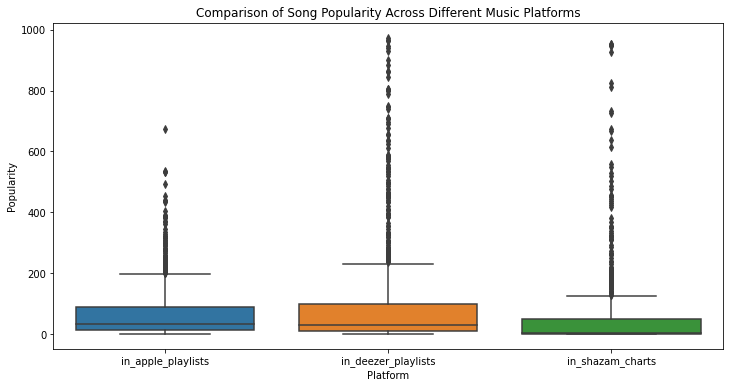

In [19]:
# Selecting the popularity indicators for each platform
platform_columns = ['in_apple_playlists', 'in_deezer_playlists', 'in_shazam_charts']

# Creating a new DataFrame for platform comparison
platform_comparison_data = df[platform_columns]

# Melting the DataFrame for better visualization
platform_comparison_melted = platform_comparison_data.melt(var_name='Platform', value_name='Popularity')

# Visualizing the data
plt.figure(figsize=(12, 6))
sns.boxplot(x='Platform', y='Popularity', data=platform_comparison_melted)
plt.title('Comparison of Song Popularity Across Different Music Platforms')
plt.show()


**Apple Music (Blue):** The popularity of songs on Apple Music is spread over a wide range, but the median value (the line in the middle of the box) is relatively low. This could indicate that songs generally have a more consistent level of popularity on the platform, though some tracks are much more popular than others.

**Deezer (Orange):** On Deezer, the song popularity has a higher median and a lot more outliers. This suggests that certain songs reach extremely high levels of popularity on the platform, which could indicate that users show intense interest in certain tracks.

**Shazam (Green):** Popularity on Shazam has the lowest median value and a large number of high outliers. Considering that Shazam is a music identification app, this shows that users tend to identify new and trending songs. Additionally, a popular song can suddenly gain a lot of interest, resulting in a high number of outliers.

This graph demonstrates that the metrics of popularity on platforms are not solely based on total stream numbers; factors such as user interactions, platform algorithms, and the specific popularity of songs within the platform are also significant. Particularly, the high outliers on Deezer and Shazam suggest that some songs may explode in popularity and reach very high levels of success on these platforms.

### The Influence of Artist Collaboration on Song Popularity

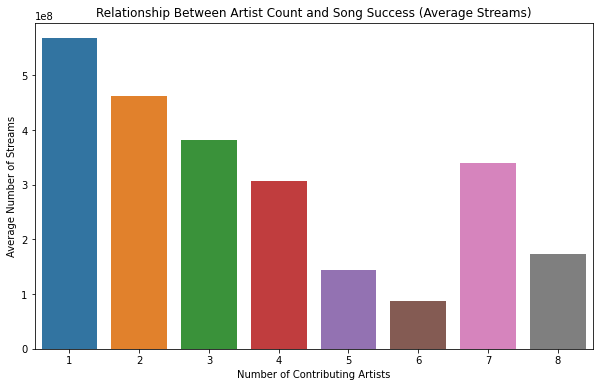

In [20]:
# For simplicity, we'll focus on 'artist_count' and its relationship with 'streams' as a success indicator.
# We'll perform a groupby operation to see if there's a trend in the number of streams based on the artist count.

# Grouping the data by artist count and calculating the average number of streams
artist_count_streams = df.groupby('artist_count')['streams'].mean().reset_index()

# Visualizing the relationship between artist count and streams
plt.figure(figsize=(10, 6))
sns.barplot(data=artist_count_streams, x='artist_count', y='streams')
plt.title('Relationship Between Artist Count and Song Success (Average Streams)')
plt.xlabel('Number of Contributing Artists')
plt.ylabel('Average Number of Streams')
plt.show()




**Solo Artist (1):** The graph shows that songs by a single artist have high average streaming numbers. This could indicate that solo artists have a strong fan base or a significant level of popularity.

**Two and Three Artists (2 & 3):** Songs featuring two and three artists show a drop in average streaming numbers. This might suggest that duets or collaborations appeal to a different audience compared to solo performances.

**Four, Five, Six Artists (4, 5, 6):** There is a decrease in average streaming numbers for songs involving four, five, and six artists. This indicates that having a large number of artists on a track does not always make it more popular.

**Seven Artists (7):** Songs featuring seven artists again have high average streaming numbers. This could imply that large collaborations or compilations with various artists might be particularly appealing.

**Eight Artists (8):** Songs with eight contributing artists have lower average streaming numbers, suggesting that beyond a certain point, the number of artists on a track may have a negative impact on popularity.


### Clustering Analysis of Song Features

We started by selecting relevant audio features from our dataset.
We then normalized these features to ensure that each feature contributes equally to the analysis.
Using the K-Means clustering algorithm, we segmented the songs into distinct clusters. The number of clusters was determined based on various metrics such as the elbow method and silhouette score.
After identifying the optimal number of clusters, we trained our K-Means model on the dataset and assigned each song to a specific cluster.

/Users/mac/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

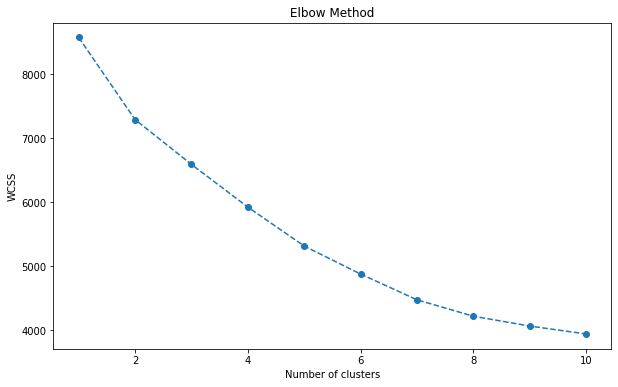

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting features for clustering
features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 
            'acousticness_%', 'instrumentalness_%', 'liveness_%', 
            'speechiness_%', 'streams']

# Preparing the data for clustering
cluster_data = df[features]

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Determining the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


By looking at the Elbow chart, we will try to find the point where the rate of decrease of WCSS changes significantly. This is usually the point on the chart that looks like an elbow and the curve slows down.

There appears to be a point in your graph where the WCSS value first decreases rapidly and then decreases more slowly. We can say that a bend point is formed at the number of 3 or 4 clusters. This means that the improvement of the model decreases as the number of clusters increases.

Based on this analysis, I will run the model again, setting the k-means clustering to 3 or 4 clusters, and examine the results

In [22]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Selecting features for clustering
features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 
            'acousticness_%', 'instrumentalness_%', 'liveness_%', 
            'speechiness_%', 'streams']

# Preparing the data for clustering
cluster_data = dfcopy[features]

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Fitting k-means models for 3 and 4 clusters
kmeans_3 = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(scaled_data)
kmeans_4 = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(scaled_data)

# Adding cluster labels to the original data
dfcopy['cluster_3'] = kmeans_3.labels_
dfcopy['cluster_4'] = kmeans_4.labels_

# Count the number of tracks in each cluster for both scenarios
cluster_counts_3 = dfcopy['cluster_3'].value_counts().sort_index()
cluster_counts_4 = dfcopy['cluster_4'].value_counts().sort_index()

(cluster_counts_3, cluster_counts_4)


/Users/mac/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(cluster_3
 0    149
 1    552
 2    252
 Name: count, dtype: int64,
 cluster_4
 0    423
 1    188
 2    325
 3     17
 Name: count, dtype: int64)

With 3 clusters, the distribution is more balanced, except for Cluster 1, which contains a significantly larger number of songs. Consisting of 4 clusters, there is one cluster (Cluster 3) containing very few songs; these may be very specific songs that are quite different from the rest, or they may be outliers.

Choosing between the two depends on what you find more meaningful for analysis:

If we aim to see a broader categorization of songs, 3 clusters may be the right choice.
If we want to explore the possibility of a niche or a highly specific cluster of songs, 4 clusters can reveal interesting patterns, with the smaller cluster being particularly prominent.
The next step will be to analyze the centroids of each cluster to understand the characteristics of the songs within them. This will give you insight into what makes each set different, such as whether a set contains songs that are particularly high in energy or danceability.

In [23]:
# Re-importing libraries and performing clustering with 4 clusters
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Selecting features for clustering
features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 
            'acousticness_%', 'instrumentalness_%', 'liveness_%', 
            'speechiness_%', 'streams']

# Preparing the data for clustering
cluster_data = dfcopy[features]

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Fitting k-means model for 4 clusters
kmeans_4 = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(scaled_data)

# Adding cluster labels to the original data
dfcopy['cluster_4'] = kmeans_4.labels_

# Compute the centroids
centroids = kmeans_4.cluster_centers_

# Inverting the scaling to interpret the centroids in the original scale
original_centroids = scaler.inverse_transform(centroids)

# Creating a DataFrame for the centroids for easier interpretation
centroid_df = pd.DataFrame(original_centroids, columns=features)

centroid_df


/Users/mac/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams
0,117.252955,77.598109,67.730496,70.255319,20.803783,0.243499,15.706856,12.456265,4.506915e+08
1,116.765957,56.164894,37.531915,43.196809,65.414894,1.143617,15.914894,7.792553,6.264728e+08
2,132.750769,59.732308,39.261538,68.990769,12.803077,0.655385,23.018462,8.704615,5.406159e+08
3,122.764706,60.352941,32.235294,58.647059,31.000000,57.411765,14.117647,5.411765,3.443171e+08


**Cluster 0 :** This cluster likely represents very popular and energetic dance songs that are not acoustic and have a significant amount of lyrics.

**Cluster 1 :** This cluster seems to consist of more acoustic and less energetic songs, which might be more emotional or calm, and they are the most streamed.

**Cluster 2 :** Cluster 2 might represent more upbeat, lively songs that are good for active listening or parties due to the high BPM and energy.

**Cluster 3:** Cluster 3 is unique due to its very high instrumentalness, indicating these are likely instrumental tracks or songs with a focus on musical rather than lyrical content.

These clusters can help Spotify understand different segments of their music catalogue and can be used to tailor playlists to different listener preferences, marketing campaigns, and even for recommendations to users.

### Recommendation System For Users

Have developed a Content-Based Recommendation System to suggest songs that are similar to a user's favorite track. This system utilizes the characteristics of songs, such as danceability, energy, valence, and others, to find and recommend similar songs. Here's an overview of how we built this system:

We started by selecting relevant features that define a song's characteristics, including 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', and 'speechiness_%'.
These features help in understanding the nature and mood of the songs, which are crucial for recommending similar tracks.

We used MinMaxScaler to normalize the feature values. This step ensures that all features contribute equally to the similarity calculation, regardless of their original scale or units.

To determine the similarity between songs, we computed the cosine similarity between their feature vectors. Cosine similarity is a metric used to measure how similar the songs are irrespective of their magnitude.
This resulted in a similarity matrix where each element represents the similarity score between a pair of songs.

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Selecting the relevant features for the recommendation system
features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
spotify_features = df[features]

# Normalizing the feature values
scaler = MinMaxScaler()
spotify_features_normalized = scaler.fit_transform(spotify_features)

# Calculating the cosine similarity between the tracks
similarity_matrix = cosine_similarity(spotify_features_normalized)

# Convert the similarity matrix to a DataFrame for easier handling
similarity_df = pd.DataFrame(similarity_matrix, index=df['track_name'], columns=df['track_name'])

# Display a portion of the similarity matrix
similarity_df.iloc[:5, :5]  # Displaying the first 5 rows and columns as a sample



track_name,Seven (feat. Latto) (Explicit Ver.),LALA,vampire,Cruel Summer,WHERE SHE GOES
track_name,,,,,
Seven (feat. Latto) (Explicit Ver.),1.000000,0.981130,0.909852,0.963446,0.734265
LALA,0.981130,1.000000,0.922634,0.971832,0.772405
vampire,0.909852,0.922634,1.000000,0.923869,0.764240
Cruel Summer,0.963446,0.971832,0.923869,1.000000,0.756389
WHERE SHE GOES,0.734265,0.772405,0.764240,0.756389,1.000000


In [25]:
similarity_df

track_name,Seven (feat. Latto) (Explicit Ver.),LALA,vampire,Cruel Summer,WHERE SHE GOES,Sprinter,Ella Baila Sola,Columbia,fukumean,La Bebe - Remix,...,Privileged Rappers,The Astronaut,BackOutsideBoyz,Broke Boys,The Great War,My Mind & Me,Bigger Than The Whole Sky,A Veces (feat. Feid),En La De Ella,Alone
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),1.000000,0.981130,0.909852,0.963446,0.734265,0.934780,0.985846,0.905255,0.845677,0.882975,...,0.920331,0.853599,0.781504,0.716807,0.983051,0.812732,0.475823,0.978544,0.978692,0.943543
LALA,0.981130,1.000000,0.922634,0.971832,0.772405,0.934388,0.940325,0.907516,0.894256,0.875901,...,0.947918,0.921041,0.815143,0.786327,0.978551,0.745976,0.361344,0.984506,0.997534,0.970361
vampire,0.909852,0.922634,1.000000,0.923869,0.764240,0.868368,0.898189,0.926264,0.918506,0.832077,...,0.868166,0.905448,0.850862,0.843416,0.932030,0.802024,0.525575,0.878413,0.920908,0.948450
Cruel Summer,0.963446,0.971832,0.923869,1.000000,0.756389,0.918436,0.939643,0.885718,0.840317,0.890799,...,0.915880,0.904628,0.812775,0.806861,0.978589,0.722404,0.386790,0.950315,0.961133,0.949873
WHERE SHE GOES,0.734265,0.772405,0.764240,0.756389,1.000000,0.709865,0.707079,0.802233,0.775809,0.670508,...,0.721360,0.814559,0.646779,0.717390,0.774775,0.645660,0.384273,0.713021,0.767569,0.820077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,0.812732,0.745976,0.802024,0.722404,0.645660,0.792846,0.859586,0.911301,0.791456,0.772392,...,0.717009,0.662495,0.672392,0.637861,0.801157,1.000000,0.877219,0.715525,0.758115,0.813811
Bigger Than The Whole Sky,0.475823,0.361344,0.525575,0.386790,0.384273,0.451002,0.585482,0.654093,0.461848,0.474529,...,0.327751,0.312822,0.370072,0.356909,0.479825,0.877219,1.000000,0.319461,0.370129,0.479561
A Veces (feat. Feid),0.978544,0.984506,0.878413,0.950315,0.713021,0.951902,0.932382,0.845796,0.856119,0.897164,...,0.962005,0.842768,0.827075,0.742478,0.945783,0.715525,0.319461,1.000000,0.988436,0.919514


We created a function recommend_most_similar_tracks that takes a song name and the similarity matrix as input, and returns the top three most similar songs.
This function sorts the similarity scores for the given song in descending order and picks the top songs, ensuring that the recommended tracks are the ones most similar to the user's favorite.

In [26]:
def recommend_most_similar_tracks(track_name, similarity_df, num_tracks=3):
    # Check if the track is in the similarity DataFrame
    if track_name not in similarity_df.index:
        return "Song not found"

    # Get the similarity scores for the specified track
    similarity_scores = similarity_df[track_name]

    # Sort the scores in descending order and select the most similar tracks
    most_similar_tracks = similarity_scores.sort_values(ascending=False)[1:num_tracks+1].index.tolist()

    return most_similar_tracks

# Assume the song listened to by the user
user_listened_track = "MyFavoriteSong"

# Suggest three songs that are most similar
recommended_tracks = recommend_most_similar_tracks(user_listened_track, similarity_df)
print(recommended_tracks)


Song not found


In [27]:
recommended_tracks = recommend_most_similar_tracks("vampire", similarity_df, num_tracks=3)

In [28]:
recommended_tracks

['Ghost', 'You Proof', 'POLARIS - Remix']

To ensure the accuracy of our recommendations, we implemented a function to check the similarity scores between the user's favorite song and the recommended songs.
This step confirms that the recommended songs indeed have high similarity scores with the user's chosen song.

In [29]:
def check_similarity(track_name, recommended_tracks, similarity_df):
    # Get the similarity scores for the specified track
    similarity_scores = similarity_df[track_name]

    # Retrieve the similarity scores for the recommended tracks
    scores = {track: similarity_scores[track] for track in recommended_tracks}

    return scores

# Check recommended songs
similarity_scores = check_similarity("vampire", recommended_tracks, similarity_df)
print(similarity_scores)


{'Ghost': 0.9981903001581112, 'You Proof': 0.9924353115174284, 'POLARIS - Remix': 0.9879554126621423}


Through these steps, we have successfully created a Content-Based Recommendation System that can personalize the music listening experience by suggesting tracks that align well with the user's preferences.